### Визуальное исследование данных
Вопросы:
- Как в целом ведет себя цена на анальгетики по неделям?
- Как зависят продажи анальгетиков от цены? от маркетинговых акций? от праздников?
- Как выглядит кривая эластичности спроса? (указание заказчика)
- Как выглядят корреляции между признаками?
  
Шаги:
1. Добавить в датасет праздники.
2. Добавить в датасет суммы продаж.
3. Сгруппировать и визуализировать выручку по неделям.
4. Удалить из графика выручки выбросы.
5. Нарисовать зависимость продаж от цен по самым востребованным позициям.
6. Нарисовать график эластичности спроса.
7. Нарисовать зависимость продаж от марки лекарства, размера упаковки, маркетинговых акций, праздников.
8. Нарисовать совстречаемость и корреляцию признаков.

In [53]:
import pandas as pd
import seaborn as sns
import os
os.chdir("D:/demo/ML/demo_dominicks")

from src.utils import get_holidays, get_holiday_names

In [4]:
baseline_df = pd.read_csv('data/baseline_dataset.csv', index_col=0)
baseline_df.head()

,com_code,upc,descrip,size,store,week,move,price,sale,age60,...,educ,ethnic,income,hhlarge,workwom,hval150,sstrdist,sstrvol,cpdist5,cpwvol5
0,953,1192603016,CAFFEDRINE CAPLETS 1,16 CT,76,306,0,0.00,N,0.149192,...,0.087712,0.425324,10.140613,0.144374,0.296353,0.09633,3.55838,0.909091,1.075632,0.214417
1,953,1192603016,CAFFEDRINE CAPLETS 1,16 CT,76,307,1,2.99,N,0.149192,...,0.087712,0.425324,10.140613,0.144374,0.296353,0.09633,3.55838,0.909091,1.075632,0.214417
2,953,1192603016,CAFFEDRINE CAPLETS 1,16 CT,76,308,0,0.00,N,0.149192,...,0.087712,0.425324,10.140613,0.144374,0.296353,0.09633,3.55838,0.909091,1.075632,0.214417
3,953,1192603016,CAFFEDRINE CAPLETS 1,16 CT,76,309,0,0.00,N,0.149192,...,0.087712,0.425324,10.140613,0.144374,0.296353,0.09633,3.55838,0.909091,1.075632,0.214417
4,953,1192603016,CAFFEDRINE CAPLETS 1,16 CT,76,310,0,0.00,N,0.149192,...,0.087712,0.425324,10.140613,0.144374,0.296353,0.09633,3.55838,0.909091,1.075632,0.214417


In [6]:
#baseline_df['revenue'] = baseline_df.apply(lambda x: x.move * x.price, axis=1)
baseline_df['revenue'] = baseline_df.move * baseline_df.price
baseline_df.head()

,com_code,upc,descrip,size,store,week,move,price,sale,age60,...,ethnic,income,hhlarge,workwom,hval150,sstrdist,sstrvol,cpdist5,cpwvol5,revenue
0,953,1192603016,CAFFEDRINE CAPLETS 1,16 CT,76,306,0,0.00,N,0.149192,...,0.425324,10.140613,0.144374,0.296353,0.09633,3.55838,0.909091,1.075632,0.214417,0.00
1,953,1192603016,CAFFEDRINE CAPLETS 1,16 CT,76,307,1,2.99,N,0.149192,...,0.425324,10.140613,0.144374,0.296353,0.09633,3.55838,0.909091,1.075632,0.214417,2.99
2,953,1192603016,CAFFEDRINE CAPLETS 1,16 CT,76,308,0,0.00,N,0.149192,...,0.425324,10.140613,0.144374,0.296353,0.09633,3.55838,0.909091,1.075632,0.214417,0.00
3,953,1192603016,CAFFEDRINE CAPLETS 1,16 CT,76,309,0,0.00,N,0.149192,...,0.425324,10.140613,0.144374,0.296353,0.09633,3.55838,0.909091,1.075632,0.214417,0.00
4,953,1192603016,CAFFEDRINE CAPLETS 1,16 CT,76,310,0,0.00,N,0.149192,...,0.425324,10.140613,0.144374,0.296353,0.09633,3.55838,0.909091,1.075632,0.214417,0.00


In [7]:
holidays = get_holidays()
for h_name in get_holiday_names():
    baseline_df[h_name] = baseline_df.week.isin(holidays[h_name]).astype(int)


In [51]:
baseline_df.query('newyear != 0').sample(5)

,com_code,upc,descrip,size,store,week,move,price,sale,age60,...,revenue,halloween,thanksgiving,christmas,newyear,pres_day,easter,mem_day,indep_day,labor_day
4896926,953,31284315450,MIDOL 200,16 CT,103,68,1,2.49,N,0.058054,...,2.49,0,0,0,1,0,0,0,0,0
1804889,953,30045044907,TYLENOL X/S CAPLET,50 CT,131,68,13,4.69,N,0.170655,...,60.97,0,0,0,1,0,0,0,0,0
5804842,953,31981000623,NODOZ,16 CT,80,225,0,0.00,N,0.152691,...,0.00,0,0,0,1,0,0,0,0,0
5525337,953,31981000168,EXCEDRIN X-STR,200 CT,129,225,0,0.00,N,0.103413,...,0.00,0,0,0,1,0,0,0,0,0
1837272,953,30045044909,TYLENOL X/S CAPLET,100 CT,132,68,14,5.79,B,0.139617,...,81.06,0,0,0,1,0,0,0,0,0


In [52]:
revenue_gr = baseline_df.groupby('week')['revenue'].sum()
revenue_gr.head()

week
1    78417.14
2    81184.05
3    81335.81
4    82781.49
5    80211.78
Name: revenue, dtype: float64

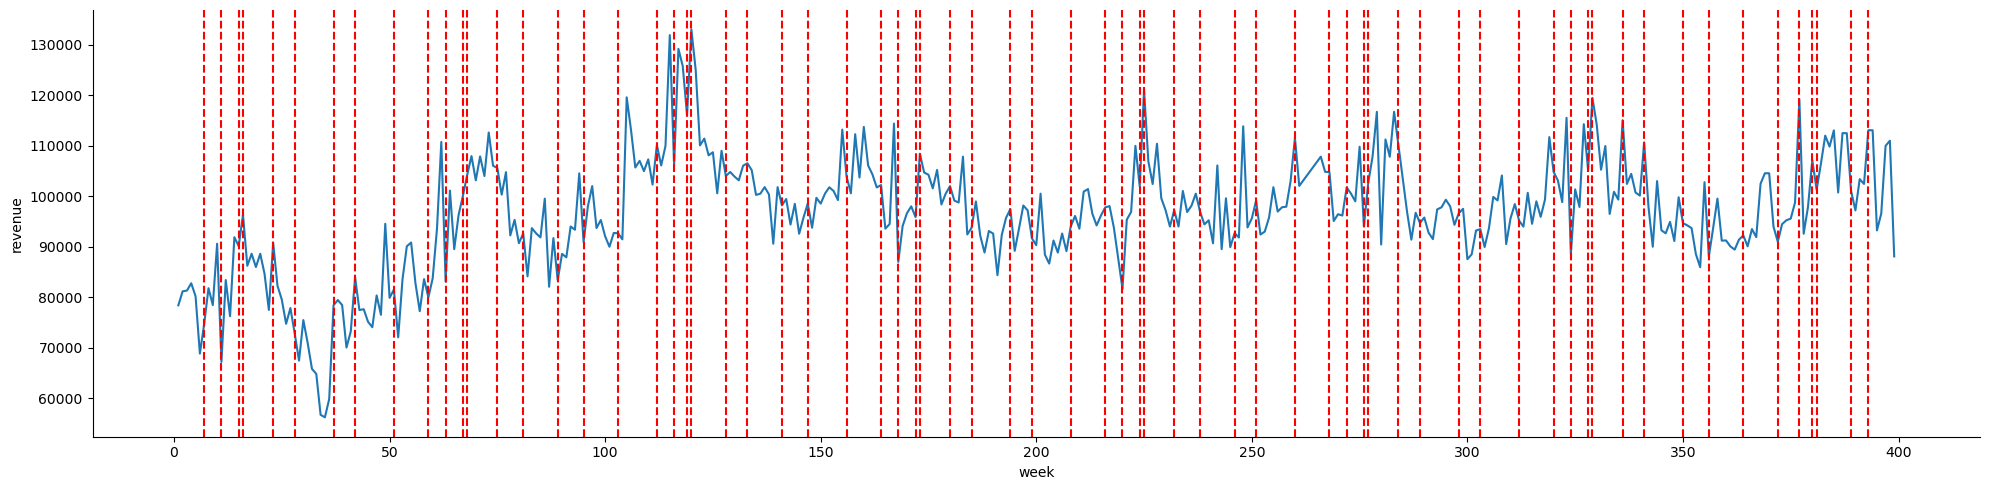

In [65]:
g = sns.relplot(
    data=revenue_gr,
    #x="ride_date",
    #y="deviation_normal",
    #hue="target_class",
    kind="line",  # или scatter
    aspect=4,
)
for _type in get_holiday_names():
    for line in get_holidays()[_type]:
        g.refline(x = line, color = "red")
#g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

#### Выводы
1. На графике виден тренд с 0 по 130 неделю. И боковик - со 130 недели до конца.
2. Праздники не всегда совпадают с локальными пиками. Имеет смысл рассматривать интервал +-1 неделя от праздника.

In [57]:
move_gr = baseline_df.groupby('week')['move'].sum()
move_gr.head()

week
1    20570
2    20946
3    21270
4    22829
5    21226
Name: move, dtype: int64

In [60]:
vertical_lines = get_holidays()['christmas']
vertical_lines

[15, 67, 119, 172, 224, 276, 328, 380]

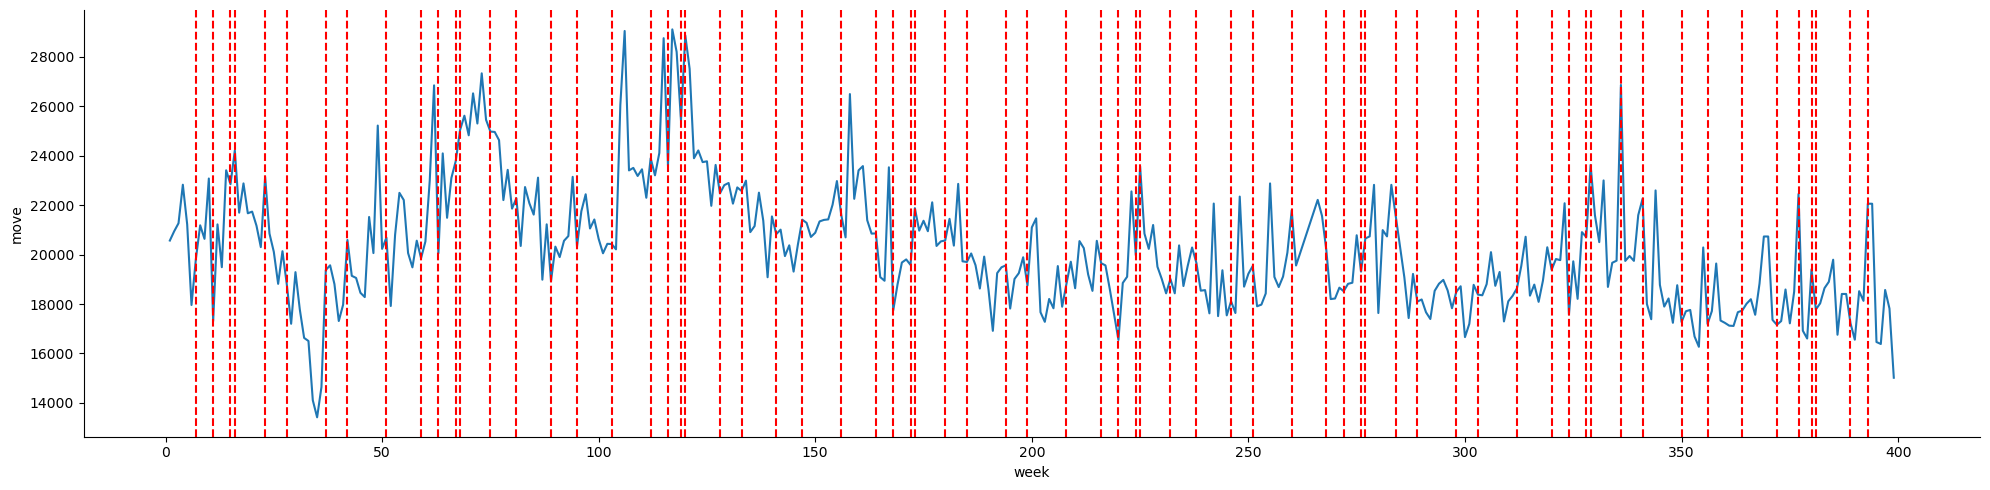

In [64]:
g = sns.relplot(
    data=move_gr,
    #x="ride_date",
    #y="deviation_normal",
    #hue="target_class",
    kind="line",  # или scatter
    aspect=4,
)
for _type in get_holiday_names():
    for line in get_holidays()[_type]:
        g.refline(x = line, color = "red")
#g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

#### Выводы по продажам упаковок
1. На графике виден восходящий тренд с 0 по 130 неделю. Нисходящий тренд - со 130 недели до 225. Боковик - с 225 до конца. В конце - вероятен слабый нисходящий тренд. С учетом того, что после 130 недели выручка находится в боковике, получается, что сумма, которую люди готовы потратить на анальгетики остается фиксированной, а вот число упаковок потребители покупают меньше. **Возможно, прогнозировать спрос стоит не в количестве упаковок, а в деньгах покупателей. И уже эту сумму делить на имеющуюся цену упаковки.**
2. Праздники не всегда совпадают с локальными пиками. **Имеет смысл рассматривать интервал +-1 неделя от праздника.**

### Зависимость продаж от цены
Выберем 10 самых продаваемых позиций и построим для них график.

In [139]:
upc_index = baseline_df.upc.value_counts()[:10]
upc_index.head(10)

upc
30573015040    32110
30573016040    32110
30045046850    32109
3828161017     32109
31284310117    32109
31284310112    32109
3828161013     32106
3828161065     32106
3828161041     32106
30573020045    32105
Name: count, dtype: int64

In [235]:
demand_df = baseline_df[baseline_df.upc.isin(baseline_df.upc.value_counts()[:10].index)]
demand_df = demand_df.loc[:,['upc','descrip', 'size', 'move', 'price', 'revenue']]
demand_df.dropna(inplace=True)
demand_df.head()

,upc,descrip,size,move,price,revenue
208685,3828161013,DOM REG STR NON-ASP,100 CT,2,1.89,3.78
208686,3828161013,DOM REG STR NON-ASP,100 CT,0,0.00,0.00
208687,3828161013,DOM REG STR NON-ASP,100 CT,1,1.89,1.89
208688,3828161013,DOM REG STR NON-ASP,100 CT,3,1.89,5.67
208689,3828161013,DOM REG STR NON-ASP,100 CT,1,1.89,1.89


In [308]:
demand_gr = demand_df[demand_df.move > 0].copy()
demand_gr.sort_values(['upc', 'price'], ascending=False, inplace=True)
demand_gr['upc_name'] = demand_gr['descrip'] + ' ' + demand_gr['size']
demand_gr.head()

,upc,descrip,size,move,price,revenue,upc_name
4342781,31284310117,BAYER ASPIRIN,50 CT,12,4.62,55.44,BAYER ASPIRIN 50 CT
4315424,31284310117,BAYER ASPIRIN,50 CT,3,4.19,12.57,BAYER ASPIRIN 50 CT
4315485,31284310117,BAYER ASPIRIN,50 CT,3,4.19,12.57,BAYER ASPIRIN 50 CT
4315486,31284310117,BAYER ASPIRIN,50 CT,5,4.19,20.95,BAYER ASPIRIN 50 CT
4315490,31284310117,BAYER ASPIRIN,50 CT,1,4.19,4.19,BAYER ASPIRIN 50 CT


In [309]:
demand_gr['upc_cat'] = demand_gr.upc_name.astype('category')
demand_gr = demand_gr.groupby(['upc', 'price'], sort=False).agg(
        move_sum=('move', 'sum'), 
        revenue_sum=('revenue', 'sum'), 
        upc_cat=('upc_cat', 'first')).reset_index()
demand_gr['cum_sum'] = demand_gr.groupby(['upc'], sort=False)['move_sum'].cumsum()
max_prices = demand_gr.groupby(['upc'], sort=False)['price'].max()
demand_gr['max_price'] = demand_gr.apply(lambda x: max_prices[x.upc], axis=1)
demand_gr[80:100]


,upc,price,move_sum,revenue_sum,upc_cat,cum_sum,max_price
80,31284310117,3.04,442,1343.68,BAYER ASPIRIN 50 CT,65432,4.62
81,31284310117,2.99,5318,15900.82,BAYER ASPIRIN 50 CT,70750,4.62
82,31284310117,2.94,296,870.24,BAYER ASPIRIN 50 CT,71046,4.62
83,31284310117,2.79,5,13.95,BAYER ASPIRIN 50 CT,71051,4.62
84,31284310117,2.59,757,1960.63,BAYER ASPIRIN 50 CT,71808,4.62
85,31284310112,7.49,2440,18275.60,BAYER ASPIRIN 100 CT,2440,7.49
86,31284310112,6.99,3,20.97,BAYER ASPIRIN 100 CT,2443,7.49
87,31284310112,6.74,14,94.36,BAYER ASPIRIN 100 CT,2457,7.49
88,31284310112,6.63,7,46.41,BAYER ASPIRIN 100 CT,2464,7.49
89,31284310112,6.49,3,19.47,BAYER ASPIRIN 100 CT,2467,7.49


In [301]:
demand_gr.groupby(['upc'], sort=False)['price'].max()

upc
31284310117     4.62
31284310112     7.49
30573020045     8.49
30573016040    10.39
30573015040    10.39
30045046850     6.25
3828161065      4.89
3828161041      9.98
3828161017      5.19
3828161013      5.29
Name: price, dtype: float64

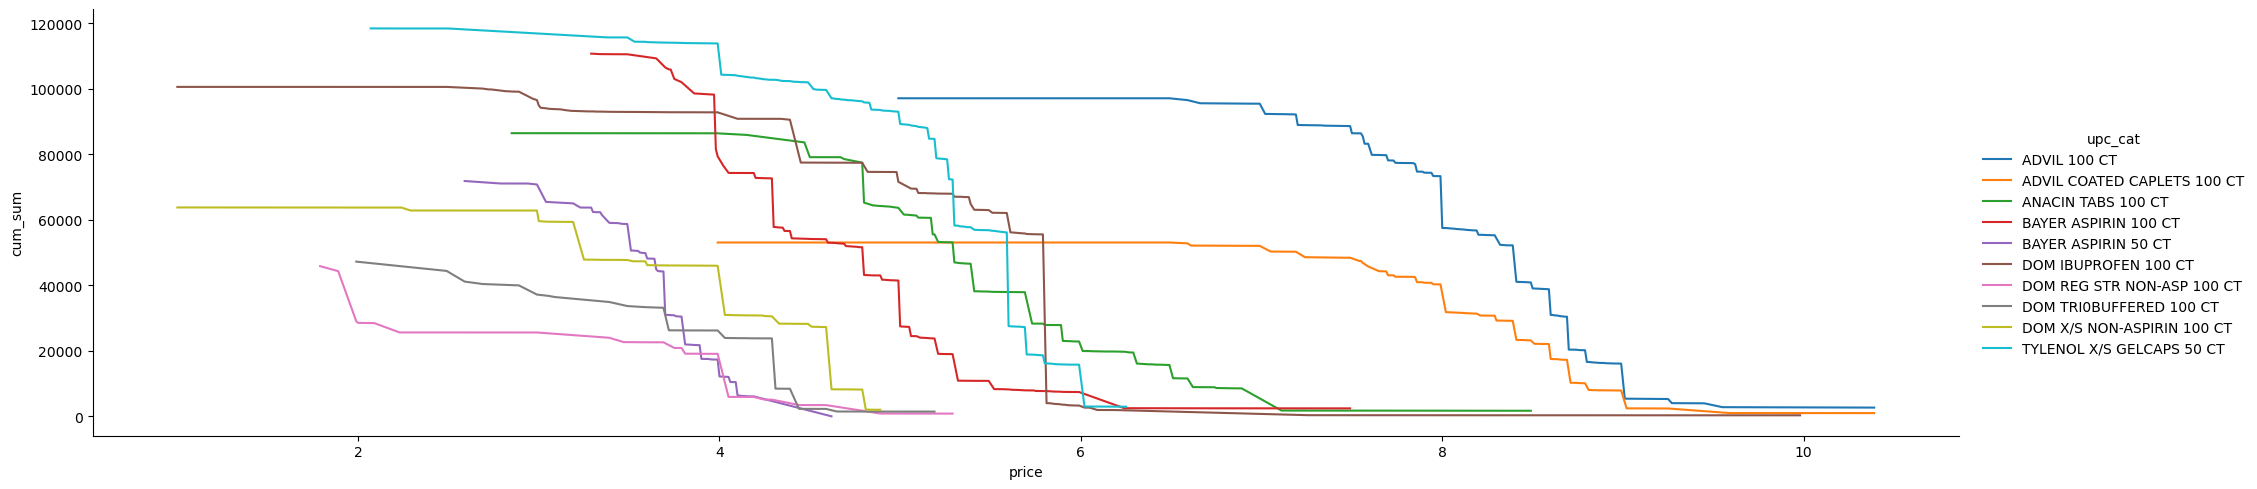

In [264]:
g = sns.relplot(
    data=demand_gr,
    x="price",
    y="cum_sum",
    hue="upc_cat",
    kind="line",  # или scatter
    aspect=4,
)

In [140]:
ana_upc = pd.read_parquet('data/raw/ana_upc.parquet')
ana_upc[ana_upc.upc.isin(upc_index.index)]

,com_code,upc,descrip,size,case,nitem
43,953,3828161013,DOM REG STR NON-ASP,100 CT,6,6125121
44,953,3828161017,DOM TRI0BUFFERED,100 CT,6,6125391
48,953,3828161041,DOM IBUPROFEN,100 CT,6,6100141
55,953,3828161065,DOM X/S NON-ASPIRIN,100 CT,6,6100101
194,953,30045046850,TYLENOL X/S GELCAPS,50 CT,6,6120051
290,953,30573015040,ADVIL,100 CT,6,6122041
302,953,30573016040,ADVIL COATED CAPLETS,100 CT,6,6122091
319,953,30573020045,ANACIN TABS,100 CT,6,6121701
391,953,31284310112,BAYER ASPIRIN,100 CT,6,6122801
392,953,31284310117,BAYER ASPIRIN,50 CT,6,6122701
